### Resolución Problema No. 2 - Mónica Velásquez

##### Resolución parte No.1

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [7]:
train_dir = r'train_set'  
validation_dir = r'test_set' 

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,          
    rotation_range=40,        
    width_shift_range=0.2,    
    height_shift_range=0.2,   
    shear_range=0.2,          
    zoom_range=0.2,           
    horizontal_flip=True,     
    fill_mode='nearest'       
)

In [9]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)

In [10]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),   
    batch_size=32,            
    class_mode='categorical'  
)

Found 736 images belonging to 6 classes.


In [11]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),  
    batch_size=32,
    class_mode='categorical'
)

Found 2940 images belonging to 6 classes.


In [12]:
print(f"Total imágenes de entrenamiento: {train_generator.samples}")
print(f"Total imágenes de validación: {validation_generator.samples}")

Total imágenes de entrenamiento: 736
Total imágenes de validación: 2940


##### Resolución parte No.2

In [13]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

In [14]:
num_classes = 6 
input_shape = (150, 150, 3)  

In [15]:
### Modelo 1
def create_model_1():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer=Adam(), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

In [16]:
### Modelo 2
def create_model_2():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer=Adam(), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

In [17]:
### Modelo 3
def create_model_3():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5)) 
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer=Adam(), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

In [18]:
def train_model(model, train_generator, validation_generator, epochs=10):
    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator
    )
    return history

In [19]:
model_1 = create_model_1()
history_1 = train_model(model_1, train_generator, validation_generator, epochs=10)

c:\Users\monic\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


c:\Users\monic\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.2668 - loss: 2.8442

c:\Users\monic\anaconda3\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


23/23 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.2706 - loss: 2.8106 - val_accuracy: 0.4752 - val_loss: 1.3279
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.6048 - loss: 1.1213 - val_accuracy: 0.5759 - val_loss: 1.2917
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.7922 - loss: 0.6919 - val_accuracy: 0.7000 - val_loss: 1.2135
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.8661 - loss: 0.4581 - val_accuracy: 0.6969 - val_loss: 1.3172
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.8641 - loss: 0.4007 - val_accuracy: 0.7276 - val_loss: 1.3154
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.9011 - loss: 0.3329 - val_accuracy: 0.7602 - val_loss: 0.9724
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.9164 - loss: 0.2683 - val_accuracy: 0.7612 - val_loss: 0.9582
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.8943 - loss: 0.3001 - val_accuracy: 0.7966 - val_loss: 0.9727
Epo

In [20]:
model_2 = create_model_2()
history_2 = train_model(model_2, train_generator, validation_generator, epochs=10)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.2268 - loss: 1.9326 - val_accuracy: 0.4265 - val_loss: 1.5204
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.5243 - loss: 1.2545 - val_accuracy: 0.5779 - val_loss: 1.1961
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.6817 - loss: 0.8077 - val_accuracy: 0.6949 - val_loss: 1.0689
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.7354 - loss: 0.6416 - val_accuracy: 0.5823 - val_loss: 1.2049
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.7689 - loss: 0.6047 - val_accuracy: 0.7656 - val_loss: 0.9734
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.8777 - loss: 0.3696 - val_accuracy: 0.7915 - val_loss: 0.8149
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.8845 - loss: 0.3400 - val_accuracy: 0.7942 - val_loss: 0.7778
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.9036 - loss: 0.2865 - val_accuracy: 0.8078 - val_loss:

In [21]:
model_3 = create_model_3()
history_3 = train_model(model_3, train_generator, validation_generator, epochs=10)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.1703 - loss: 1.7956 - val_accuracy: 0.3633 - val_loss: 1.5498
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.3945 - loss: 1.4928 - val_accuracy: 0.4214 - val_loss: 1.5117
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.5206 - loss: 1.2319 - val_accuracy: 0.6323 - val_loss: 1.1570
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.6430 - loss: 0.9680 - val_accuracy: 0.5680 - val_loss: 1.1757
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.6623 - loss: 0.8677 - val_accuracy: 0.6160 - val_loss: 1.6548
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7429 - loss: 0.7192 - val_accuracy: 0.7034 - val_loss: 0.9307
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.7496 - loss: 0.6326 - val_accuracy: 0.7061 - val_loss: 1.1115
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.7940 - loss: 0.5528 - val_accuracy: 0.7912 - val_loss:

El modelo 3 destaca por tener la menor pérdida en validación (0.5919), lo que indica que sus predicciones son más precisas en los datos nuevos que no ha visto durante el entrenamiento. Este valor reducido de pérdida es clave, ya que refleja que el modelo está aprendiendo de manera efectiva sin incurrir en errores significativos.

En cuanto a la precisión de validación, aunque el modelo 3 alcanza un 81.39%, un poco por debajo del 82.45% del modelo 2, sigue siendo bastante competitivo. Además, la ventaja de tener una menor pérdida le otorga un punto a favor en términos de rendimiento general.

Finalmente, el modelo 3 muestra menos diferencia entre la precisión en los datos de entrenamiento y los de validación en comparación con el modelo 1, lo que indica un menor riesgo de sobreajuste y sugiere una mayor capacidad de generalización.

In [22]:
model_3.save('modelo_3_mejorado.h5')

##### Resolución parte No.3

In [23]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [24]:
model_path = 'modelo_3_mejorado.h5'
model = load_model(model_path)

In [38]:
image_path = r'image.jpg'

In [39]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  
    img_array = image.img_to_array(img)  
    img_array = np.expand_dims(img_array, axis=0)  
    img_array /= 255.0  
    return img_array

In [40]:
img_preprocessed = preprocess_image(image_path)

In [41]:
prediction = model.predict(img_preprocessed)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [42]:
class_names = ['FreshBanana', 'FreshCarrot', 'FreshCucumber', 'FreshOrange', 'FreshPotato', 'FreshStrawberry']

In [43]:
predicted_class = class_names[np.argmax(prediction)]

print(f'La imagen es de: {predicted_class}')

La imagen es de: FreshStrawberry


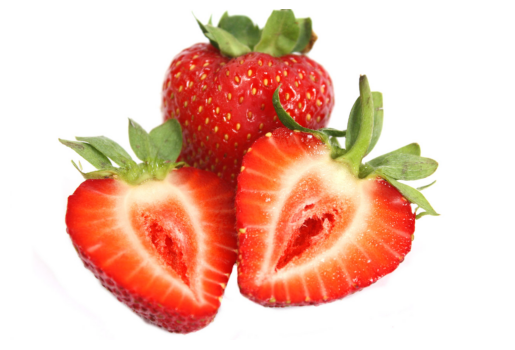

In [44]:
img = image.load_img(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()